# Coding Etiquette and Excel Reporting

## This script contains the following points: 

### 1. Import Libraries and Data

### 2. Crosstabs in Python

### 3. Task 4.10

### 4. Extra for Project

## Import libraires 

In [1]:
## Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Data 

In [2]:
## Import data by creating a path 
path = r'C:\Users\bgros\Documents\Career Foundry\07-2023 Instacart Basket Analysis'

In [3]:
## Import data
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

## Crosstabs in Python

In [ ]:
## Create crosstab in Jupyter 
crosstab = pd.crosstab(df_ords_prods_all['days_since_prior_order'], df_ords_prods_all['order_number'], dropna = False) 

In [ ]:
## Store crosstab to clipboard
crosstab.to_clipboard()

## Question 1 - Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column

### Done - see above 

In [ ]:
## Consistency checks 
df_ords_prods_all.head()

In [ ]:
## See all rows 
pd.set_option('display.max_columns', None)

In [ ]:
## Consistency checks 
df_ords_prods_all.head()

## Question 2 - Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

### Answer - I have already deleted the first and last name of customers due to PII in the previous exercise

## Question 3 - The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

### Part 1 - Creating new region column 

In [ ]:
## Create definition 

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'] 
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']


In [ ]:
## Create column 
df_ords_prods_all['region'] = df_ords_prods_all['state'].apply(lambda x: 'Northeast' if x in Northeast else
                                                              ('Midwest' if x in Midwest else
                                                              ('South' if x in South else
                                                              ('West' if x in West else np.nan))))

In [ ]:
## Consistency checks 
df_ords_prods_all.tail(20)

In [ ]:
## Create bar chart to show regions 
bar_chart_by_region = df_ords_prods_all['region'].value_counts().plot.bar()
plt.title('Count of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')

In [ ]:
## Export 
bar_chart_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_by_region.png'))

In [ ]:
## Value counts 
df_ords_prods_all['region'].value_counts()

### Part 2 - Creating crosstab

In [ ]:
crosstab = pd.crosstab(df_ords_prods_all['region'], df_ords_prods_all['spending_flag'], dropna = False)

In [ ]:
## Printing crosstab 
crosstab

## Question 4 - The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [ ]:
## Consistency checks 
df_ords_prods_all.head(15)

In [ ]:
## Creating customer activity column
df_ords_prods_all.loc[df_ords_prods_all['max_order'] <= 5, 'customer_activity'] = 'Low Activity Customer'

In [ ]:
df_ords_prods_all.loc[df_ords_prods_all['max_order'] > 5, 'customer_activity'] = 'High Activity Customer'

In [ ]:
## Consistency Checks 
df_ords_prods_all.head(10)

In [ ]:
## Check shape
df_ords_prods_all.shape

In [ ]:
## Checking value counts 
df_ords_prods_all['customer_activity'].value_counts()

In [ ]:
## Creating exclusion flag
df_ords_prods_all_2 = df_ords_prods_all.loc[df_ords_prods_all['customer_activity'] == 'High Activity Customer']

In [ ]:
## Consistency checks 
df_ords_prods_all_2.head(5)

In [ ]:
## Check shape 
df_ords_prods_all_2.shape

In [ ]:
## Export as pickle 
df_ords_prods_all_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all_2.pkl'))

## Question 5 - The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [ ]:
## Upload new data 
df_ords_prods_all_2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_2.pkl'))

In [ ]:
## Consistency Checks 
df_ords_prods_all_2.head(3)

### Age Variable 

In [ ]:
## Describing the age variable 
df_ords_prods_all_2['age'].describe()

In [ ]:
## Age Groups 
18-33
34-65
66-81

In [ ]:
##  Creating age_range column 
df_ords_prods_all_2.loc[df_ords_prods_all_2['age'] <=33, 'age_range'] = 'Young Adult (18-33)'

In [ ]:
df_ords_prods_all_2.loc[(df_ords_prods_all_2['age'] >= 34) & (df_ords_prods_all_2['age'] <= 64), 'age_range'] = 'Middle Age Adult (34-65)'

In [ ]:
df_ords_prods_all_2.loc[df_ords_prods_all_2['age'] >=65, 'age_range'] = 'Older Adult (66+)'

In [ ]:
## Value Counts 
df_ords_prods_all_2['age_range'].value_counts()

In [ ]:
## Consistency Checks 
df_ords_prods_all_2.head(3)

### Income Variable 

In [ ]:
## Describing the income variable 
df_ords_prods_all_2['income'].describe()

In [ ]:
## Age Groups 
25903-67424
67425-128150
128151-593901

In [ ]:
##  Creating income_range column 
df_ords_prods_all_2.loc[df_ords_prods_all_2['income'] <=67424, 'income_range'] = 'Low Income'

In [ ]:
df_ords_prods_all_2.loc[(df_ords_prods_all_2['income'] >= 67425) & (df_ords_prods_all_2['income'] <= 128150), 'income_range'] = 'Middle Income'

In [ ]:
df_ords_prods_all_2.loc[df_ords_prods_all_2['income'] >=128151, 'income_range'] = 'High Income'

In [ ]:
## Value counts 
df_ords_prods_all_2['income_range'].value_counts()

In [ ]:
## Consistency Checks 
df_ords_prods_all_2.head(3)

### Number of Dependants Variable 

In [ ]:
## Describing the dependants variable 
df_ords_prods_all_2['number_of_dependants'].describe()

In [ ]:
##  Creating dependants column 
df_ords_prods_all_2.loc[df_ords_prods_all_2['number_of_dependants'] == 0, 'dependants'] = 'No Dependants'

In [ ]:
df_ords_prods_all_2.loc[df_ords_prods_all_2['number_of_dependants'] >=1, 'dependants'] = 'Has Dependants'

In [ ]:
## Consistency Checks 
df_ords_prods_all_2.head(5)

In [ ]:
## Value Counts 
df_ords_prods_all_2['number_of_dependants'].value_counts()

### Department Variable 

In [ ]:
## Import department data
df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [ ]:
df_depts

In [ ]:
## Rename Unnamed column
df_depts=df_depts.rename(columns={'Unnamed: 0' : 'department_id'})

In [ ]:
## Consistency Checks 
df_depts

In [ ]:
## Merge depts with df_ords_prods_all_2
df_ords_prods_all_3 = df_ords_prods_all_2.merge(df_depts, on = 'department_id')

In [ ]:
# Export
df_ords_prods_all_3.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all_3.pkl'))

In [ ]:
df_ords_prods_all_3.shape

In [4]:
## Import data
df_ords_prods_all_3 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_3.pkl'))

In [ ]:
## Consistency Checks 
df_ords_prods_all_3.head(3)

In [ ]:
## Value Counts 
df_ords_prods_all_3['department'].value_counts()

In [ ]:
## Crosstab between age_range and customer_activity 
crosstab = pd.crosstab(df_ords_prods_all_3['age_range'], df_ords_prods_all_3['customer_activity'], dropna = False)

In [ ]:
crosstab

In [ ]:
## Consistency Checks 
df_ords_prods_all_3['customer_activity'].unique()

In [ ]:
## Consistency Checks 
df_ords_prods_all_3['age_range'].unique()

### Customer profiling 

In [ ]:
## Groups 
Married adult with dependents = married with children
Single adult living with parents and siblings = parents and siblings 
Divorced/widowed and single adult without dependents = Single no dependents 

In [ ]:
## Value counts of fam_status 
df_ords_prods_all_3['fam_status'].value_counts()

In [ ]:
## Crosstab between fam_status and number_of_dependants 
crosstab = pd.crosstab(df_ords_prods_all_3['fam_status'], df_ords_prods_all_3['number_of_dependants'], dropna = False)

In [ ]:
crosstab

In [ ]:
## Create profiling column for single no dependents 
df_ords_prods_all_3.loc[(df_ords_prods_all_3['number_of_dependants'] == 0) & (df_ords_prods_all_3['fam_status'] =='single'), 'customer_profile'] = 'single no dependants'

In [6]:
## Create profiling column for single no dependents 
df_ords_prods_all_3.loc[(df_ords_prods_all_3['number_of_dependants'] == 0) & (df_ords_prods_all_3['fam_status'] =='divorced/widowed'), 'customer_profile'] = 'single no dependants'

In [7]:
## Create profiling column for married with children 
df_ords_prods_all_3.loc[(df_ords_prods_all_3['number_of_dependants'] >= 1) & (df_ords_prods_all_3['fam_status'] =='married'), 'customer_profile'] = 'married with children'

In [8]:
## Create profiling column for living with family with children 
df_ords_prods_all_3.loc[(df_ords_prods_all_3['number_of_dependants'] >= 1) & (df_ords_prods_all_3['fam_status'] =='living with parents and siblings'), 'customer_profile'] = 'parents and siblings with children'

In [ ]:
## Value counts 
df_ords_prods_all_3['customer_profile'].value_counts()

In [ ]:
## Consistency checks 
df_ords_prods_all_3.head(10)

In [ ]:
## Crosstab between customer_profile and customer_activity 
crosstab = pd.crosstab(df_ords_prods_all_3['customer_profile'], df_ords_prods_all_3['spending_flag'], dropna = False)

In [ ]:
crosstab

## Question 6 - Create an appropriate visualization to show the distribution of profiles.

In [ ]:
## Customer profiles bar graph
df_ords_prods_all_3['customer_profile'].value_counts().plot.bar()

## Question 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [ ]:
## Customer profile and expenditure
df_ords_prods_all_3.groupby('customer_profile').agg({'prices': ['mean', 'max', 'min']})

In [ ]:
## Customer profile and usage frequency 
df_ords_prods_all_3.groupby('customer_profile').agg({'days_since_prior_order': ['mean', 'max', 'min']})

## Question 8 - Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.


In [ ]:
## Aggregate region and customer profile 
agg_region = df_ords_prods_all_3.groupby(['region', 'customer_profile']).size().unstack(fill_value=0)
agg_region

In [ ]:
## Create bar chart 
customer_profile_by_region = agg_region.plot(kind='bar', stacked = True)
plt.title('Count of Customer Profile by Region')
plt.xlabel('Regions')
plt.ylabel('Count')

### Answer: In all of the regions, married couples with children make up the most amount of customers. The south has the most amount of customers 

In [ ]:
## Aggregate department and customer profile 
agg_department = df_ords_prods_all_3.groupby(['department', 'customer_profile']).size().unstack(fill_value=0)

In [ ]:
## Create bar chart 
customer_profile_by_department = agg_department.plot(kind='bar', stacked = True)
plt.title('Count of Customer Profile by Department')
plt.xlabel('Department')
plt.ylabel('Count')

### Answer: Produce, dairy/eggs, and beverages are the most purchased items for those married with children

## Question 9 - Produce suitable charts to illustrate your results and export them in your project folder.

### Answer: See charts above. 

In [ ]:
## Export charts 
customer_profile_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_by_region.png'))

In [ ]:
## Export charts 
customer_profile_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_by_department.png'))

In [ ]:
df_ords_prods_all_3[''].value_counts().plot.bar()

## Extra for Project 

In [9]:
## Aggregate department and customer profile 
agg_age = df_ords_prods_all_3.groupby(['age_range', 'customer_profile']).size().unstack(fill_value=0)

Text(0, 0.5, 'Count')

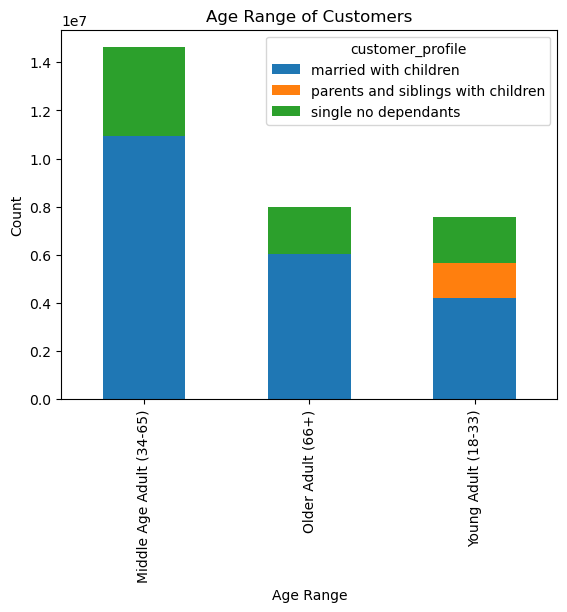

In [10]:
customer_profile_by_age = agg_age.plot(kind='bar', stacked = True)
plt.title('Age Range of Customers')
plt.xlabel('Age Range')
plt.ylabel('Count')